In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# 1. Dataset Preparation

**1.1 Load dataset**

In [ ]:
import pandas as pd

# Paths to CSV files
train_path = '/content/drive/My Drive/Deep_Learning_Labs/Project/Fashion_MNIST/fashion-mnist_train.csv'
test_path = '/content/drive/My Drive/Deep_Learning_Labs/Project/Fashion_MNIST/fashion-mnist_test.csv'

# Load data
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Combine train and test datasets
dataset = pd.concat([train_data, test_data], ignore_index=True)

**1.2 Suffle combined dataset**

In [ ]:
# Shuffle the combined dataset
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the combined DataFrame
print(dataset.head())
print(f"Combined data shape: {dataset.shape}")

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      8       0       0       0       0       0       0       0       0   
1      4       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       1       0       0   
3      1       0       0       0       0       0       0       0       0   
4      9       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       2  ...         0         0         0         6       217       220   
2       0  ...        75        74       109        55         0         3   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

**Why did I decided to join the split dataset?**

- Joining the datasets into one allowed me to build a holistic view of the entire dataset ensuring consistency across the dataset.

- Additinally, preprocessing steps such as normalization and data augmentation can be applied uniformly across the data, reducing discrepencies between the splits.

Therefore, I can later produce better splits later in the pipeline if they were for e.g imbalanced & etc.

In [ ]:
!pip install kaggle
!pip install opendatasets

# 2. Explore the dataset / Data Visualisation

2.1 Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.utils import resample
import opendatasets as od

2.2 EDA (Exploratory Data Analysis)

In [ ]:
# Checking the dataset info
print(dataset.info())

# Checking class distribution
print(dataset['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 419.2 MB
None
label
8    7000
4    7000
0    7000
1    7000
9    7000
5    7000
7    7000
3    7000
6    7000
2    7000
Name: count, dtype: int64


In [ ]:
# Check the first few rows
print(dataset.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      8       0       0       0       0       0       0       0       0   
1      4       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       1       0       0   
3      1       0       0       0       0       0       0       0       0   
4      9       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       2  ...         0         0         0         6       217       220   
2       0  ...        75        74       109        55         0         3   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

In [ ]:
# Display the summary of the dataset
print(dataset.describe())


              label        pixel1        pixel2        pixel3        pixel4  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       4.500000      0.000829      0.006743      0.037729      0.098371   
std        2.872302      0.088152      0.319931      1.472886      2.419523   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     45.000000    226.000000    185.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.242343      0.402571      0.808757      2.215843      5.649971   
std        4.360495      5.811048      8.269954    

In [ ]:
# Check data types and null values
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 419.2 MB
None


In [ ]:
# Display the number of unique labels
print(f"\nUnique labels in the dataset: {dataset['label'].nunique()}")

# Check class distribution
print(f"\n\nClass Distribution {dataset['label'].value_counts()}")



Unique labels in the dataset: 10


Class Distribution label
8    7000
4    7000
0    7000
1    7000
9    7000
5    7000
7    7000
3    7000
6    7000
2    7000
Name: count, dtype: int64


**2.3 Missing Values**

In [ ]:
# Check for missing values
missing_values = dataset.isnull().sum()
print(f"Missing values per column:\n{missing_values}")


Missing values per column:
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


**2.4 Duplicates Values**

In [ ]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 53


**2.5 Distribution of labels**

Class distribution:
label
8    7000
4    7000
0    7000
1    7000
9    7000
5    7000
7    7000
3    7000
6    7000
2    7000
Name: count, dtype: int64


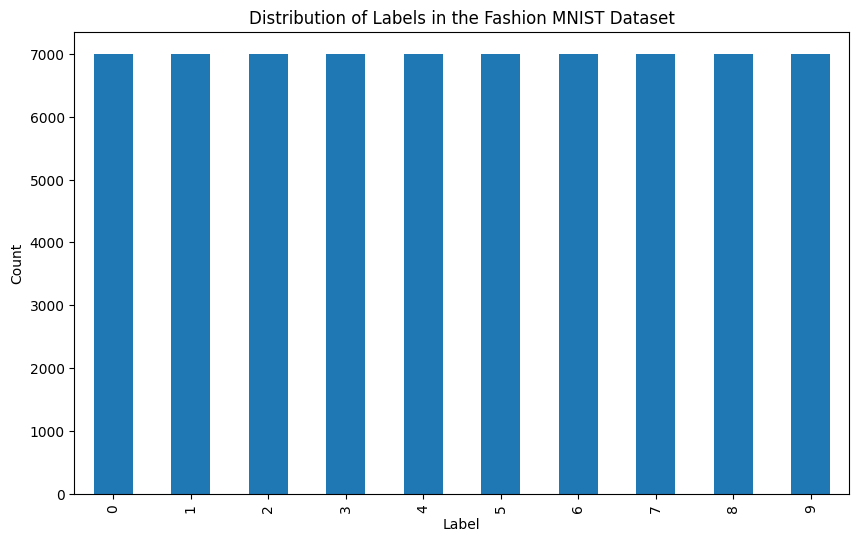

In [ ]:
# Check the number of samples per class
class_counts = dataset['label'].value_counts()

print(f"Class distribution:\n{class_counts}")

# Explicitly setting the order from 0 to 9
ascending_order = list(range(10))

# Plot class distribution for better visibility
class_counts = class_counts.reindex(ascending_order)  # reindex to ensure order
class_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Distribution of Labels in the Fashion MNIST Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=ascending_order)  # x-tick labels
plt.show()


We can see that all classes are equally distributed.

So, there is no need for OverSampling & UnderSampling.

**2.6 Image Examples**

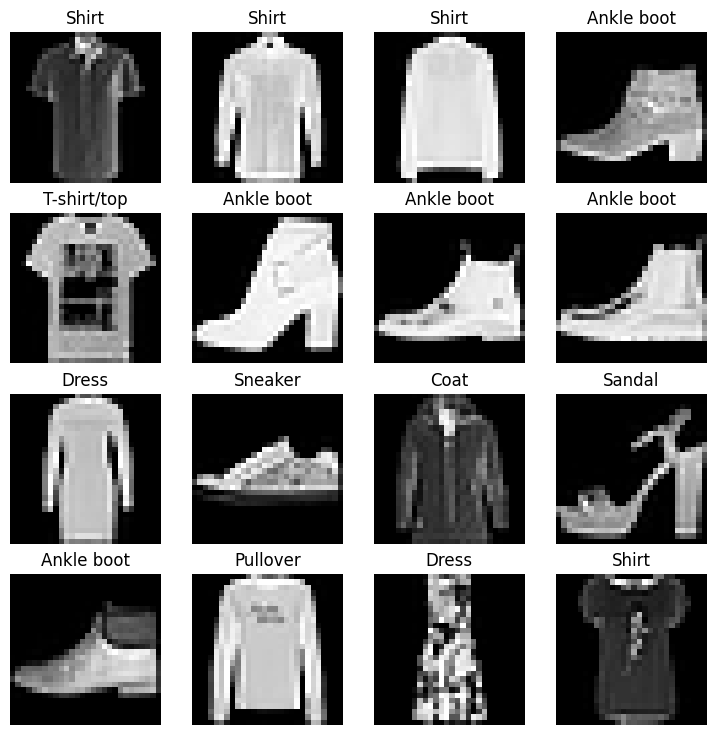

In [ ]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

fig, axes = plt.subplots(4, 4, figsize = (9,9))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = dataset.drop('label', axis=1).values[index].reshape(28,28)
        cloths = dataset['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

*Looking at these images, I understand that there images which even Humans won't be able to classifiy let alone the models.*
*Thus, I plan on using Denoising Autoencoder + Dimension Reduction*

The images are greyscale and low-resolution which is a characteristics of the Fashion_MINST dataset.
This dataset has a variety of clothing items (labels) which also means a diverse dataset.

**From the reports & comments in dialogues I read;**

Fashion MINST dataset is designed to be challenging. The dataset is is intentialnally created with low resolution images to mimic real-world screnrios where image quality might be comprised. Making it more difficult for models to learn which would result in more robust models

---



**2.7 Inspect Image Dimensions**

In [ ]:
# Check the shape of a random sample image
sample_image = dataset.drop(columns='label').iloc[0].values
sample_image = sample_image.reshape(28, 28)

print(f"Sample image shape: {sample_image.shape}")


Sample image shape: (28, 28)


**2.8 Visualize Image Statistics**

Pixel Value Statistics:
Min: 0, Max: 255
Mean Pixel Value: 72.9860, Standard Deviation: 90.0107


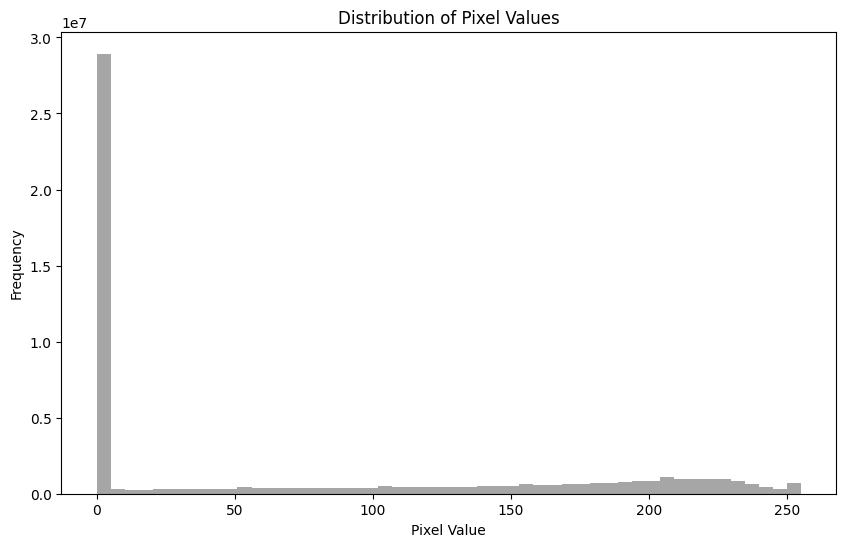

In [ ]:
# Compute statistics for the pixel values
pixel_values = dataset.drop(columns='label').values
print(f"Pixel Value Statistics:\nMin: {pixel_values.min()}, Max: {pixel_values.max()}")
print(f"Mean Pixel Value: {pixel_values.mean():.4f}, Standard Deviation: {pixel_values.std():.4f}")

# Plot histogram of pixel values
plt.figure(figsize=(10,6))
plt.hist(pixel_values.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


From the histogram chart generated, I notice it being skewed towards the left. Majoritively, because of the 0 Pixel Value which is due to the black background in the images. Otherwise the graph would be skewed to the right.

This is why, I will NOT have to do any constrast enhancements as the images are not dull/dark.

Additionally, normalization would be very beneficial given the significant variation in pixel values

Mean Pixel Value is 72.9860 which suggests that the overall image content tends to be darker.

Standard Deviation is 90.0107 which is considered high and suggets that there is a wider range of pixel values. Fashion_MINST dataset being greyscale that suggests that there is higher intensities in the images



---



# 3. Data Pre-Processing & Train Test Split

**3.1 Setting Seed**

In [ ]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

I decided to set a seed as machine learning and deep learning involve random processes randomness. Setting random seed for reproducibility of the code cell output would help with debugging and troubleshooting

**3.2 Removing Duplicates**

In [ ]:
# Removing Duplicates
dataset = dataset.drop_duplicates()

# Check if any duplicate rows
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Having duplicate rows can be a issue as it could lead to potential data leakage or data integrity. Duplicated rows can result in exact rows being inside the training and test set leading to inaccurate analysis, biased model and etc.

**3.3 Feature & Label Extraction**

In [ ]:
# Define features and labels
features = dataset.drop('label', axis=1)  # as 'label' is the target column
labels = dataset['label']

# Convert features and labels to NumPy arrays
features = features.to_numpy()
labels = labels.to_numpy()

In [ ]:
print(features.dtype)
print(labels.dtype)

int64
int64


**3.4 Splitting Data into Train , Test and Validation Set**

In [ ]:
# Split into Training, Validation, and Test Sets

from sklearn.model_selection import train_test_split

# Split into training (70%) and temp (30%) sets
x_train, x_temp, y_train, y_temp = train_test_split(
    features, labels, test_size=0.3, random_state=seed, stratify=labels
)

# Further split temp into testing (20%) and evaluation (10%)
test_size_ratio = 20 / 30  # Ratio of test set in temp
x_test, x_val, y_test, y_val = train_test_split(
    x_temp, y_temp, test_size=1 - test_size_ratio, random_state=seed, stratify=y_temp
)

# Print shapes of the splits
print(f"Training set: {x_train.shape}, {y_train.shape}")
print(f"Testing set: {x_test.shape}, {y_test.shape}")
print(f"Evaluation set: {x_val.shape}, {y_val.shape}")


Training set: (48962, 784), (48962,)
Testing set: (13989, 784), (13989,)
Evaluation set: (6996, 784), (6996,)


Fashion-MNIST has 70,000 images.
Since, this is a large dataset it is sufficient to allocate 30% for validation(20%) & testing sets(10%) without compromising training quality.

Additionally, neural networks like LeNet-5 and custom baseline architecture do perform well with larger training dataset, which explains the 70%(49,000 images)

In [ ]:
print(f"Training set: {x_train}, {y_train}")
print(f"Validation set: {x_val}, {y_val}")
print(f"Test set: {x_test}, {y_test}")

Training set: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], [4 5 5 ... 0 5 7]
Validation set: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]], [8 7 5 ... 0 4 0]
Test set: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], [2 3 9 ... 9 1 1]


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(48962, 784) (48962,)
(13989, 784) (13989,)
(6996, 784) (6996,)




---



**3.5 Data Augmentation + Reshaping the Images**

Class distribution before augmentation: {0: 4898, 1: 4896, 2: 4891, 3: 4895, 4: 4896, 5: 4900, 6: 4891, 7: 4897, 8: 4900, 9: 4898}
Class distribution after augmentation: {0: 4900, 1: 4900, 2: 4900, 3: 4900, 4: 4900, 5: 4900, 6: 4900, 7: 4900, 8: 4900, 9: 4900}


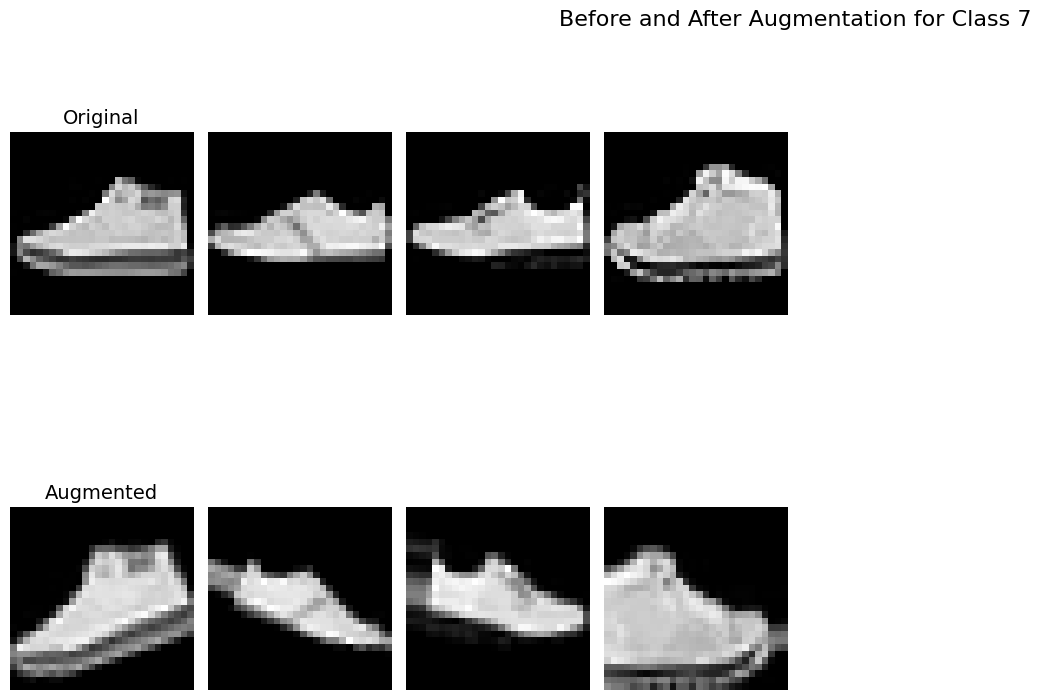

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)
print(f"Class distribution before augmentation: {dict(zip(unique, counts))}")

# Data augmentation generator
datagen = ImageDataGenerator(
    rescale=1.0/255,               # Normalize pixel values
    rotation_range=20,             # Rotate images up to 20 degrees
    width_shift_range=0.1,         # Shift images horizontally by 10%
    height_shift_range=0.1,        # Shift images vertically by 10%
    shear_range=0.2,               # Apply shear transformations
    zoom_range=0.2,                # Zoom in/out by 20%
    horizontal_flip=True,          # Flip images horizontally
    brightness_range=[0.8, 1.2],   # Adjust brightness
    fill_mode="nearest"            # Fill empty pixels with nearest values
)

x_train_augmented = []
y_train_augmented = []

# Perform augmentation for each class
for label in unique:
    # Extract data for the current class
    class_indices = np.where(y_train == label)[0]
    class_features = x_train[class_indices]
    class_labels = y_train[class_indices]

    # Reshape data to (num_samples, height, width, channels)
    img_height, img_width, channels = 28, 28, 1
    class_features = class_features.reshape(-1, img_height, img_width, channels)

    # Calculate how many new samples are needed
    num_samples_to_add = max(counts) - len(class_features)

    # Augment images if more samples are needed
    if num_samples_to_add > 0:
        augmented_images = []
        # Generate batches of augmented images
        augmented_images_batch = next(datagen.flow(class_features, batch_size=num_samples_to_add, shuffle=False))

        # Append augmented data
        augmented_images = augmented_images_batch[:num_samples_to_add]

        x_train_augmented.append(augmented_images)
        y_train_augmented.append(np.full(len(augmented_images), label))

    # Append original data
    x_train_augmented.append(class_features)
    y_train_augmented.append(class_labels)

# Combine augmented data
x_train = np.vstack(x_train_augmented)
y_train = np.hstack(y_train_augmented)

# Reshape x_train back to flattened format
x_train_flattened = x_train.reshape(x_train.shape[0], -1)

# Print the class distribution after augmentation
unique, counts = np.unique(y_train, return_counts=True)
print(f"Class distribution after augmentation: {dict(zip(unique, counts))}")

# To display original and augmented images side by side
def show_images_before_after(originals, augmented, title):
    plt.figure(figsize=(16, 8))
    for i in range(min(len(originals), 8)):  # Show up to 8 images
        # Show original image
        plt.subplot(2, 8, i + 1)
        plt.imshow(originals[i].squeeze(), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Original", fontsize=14)
        # Show augmented image
        plt.subplot(2, 8, i + 9)
        plt.imshow(augmented[i].squeeze(), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Augmented", fontsize=14)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Display original and augmented images for a specific class
class_to_display = unique[7]
indices_to_display = np.where(y_train == class_to_display)[0][4:8]

# Original images
original_images = x_train[indices_to_display]

# Apply augmentation to the same images
augmented_images = next(datagen.flow(original_images, batch_size=8, shuffle=False))

# Show before and after images
show_images_before_after(original_images, augmented_images, f"Before and After Augmentation for Class {class_to_display}")


Even small degree of class imbalance in a dataset can turn out to be significant as it can result in misleading accuracy, algorithmic bias & etc.

Using Data Augmentation, I was able to balance the rows in each label.

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(49000, 28, 28, 1) (49000,)
(13989, 784) (13989,)
(6996, 784) (6996,)


**3.6 Reshaping the Images**

In [ ]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

x_val = x_val.reshape((-1, 28, 28, 1))

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(49000, 28, 28, 1) (49000,)
(13989, 28, 28, 1) (13989,)
(6996, 28, 28, 1) (6996,)


**3.7 Normalization**

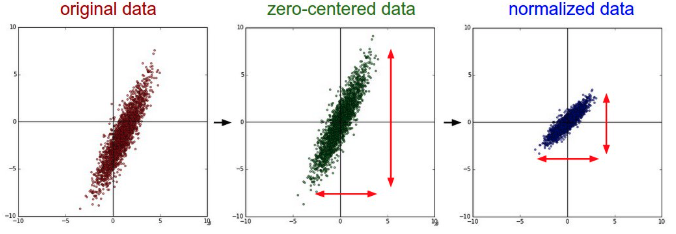.

This image is an example of what normalization does to a dataset

In [ ]:
# This was my previous normalization
# x_train = x_train.astype("float32")/255
# x_test = x_test.astype("float32")/255

# x_train= x_train.astype("float32")/255

# updated normalization
def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

# Normalize training and test data
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)
x_val = normalize_data(x_val)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(49000, 28, 28, 1) (49000,)
(13989, 28, 28, 1) (13989,)
(6996, 28, 28, 1) (6996,)


Screenshot:

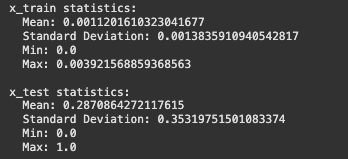

This image is a screen of the stats of the x_train & x_test, previously in a few cells down.

The difference between the mean of x_train & x_test due to pixel normalization (where /255) was causing issue with my denoising code. As a result, a few images were just black and white pixels with no obivious object in the image.

Hence, using a Min-max normalization, I was able to preserve the original data distribution, ensuring Ordinal relationships in the Fashion_MINST dataset.

As a result, the issue with the incorrect images produced in denoising the dataset was fixed



---



**3.8 Creating copies of Dataset Split**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


# Store the original x_train before denoising
x_train_original = x_train.copy()
x_test_original = x_test.copy()
x_val_original = x_val.copy()

**3.9 Calculate statistics for x_train & x_test**

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming x_train and x_test are already loaded and normalized

# Calculate statistics for x_train
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_min = np.min(x_train)
x_train_max = np.max(x_train)

# Calculate statistics for x_test
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)
x_test_min = np.min(x_test)
x_test_max = np.max(x_test)

# Print the statistics
print(f"x_train statistics:")
print(f"  Mean: {x_train_mean}")
print(f"  Standard Deviation: {x_train_std}")
print(f"  Min: {x_train_min}")
print(f"  Max: {x_train_max}")

print(f"\nx_test statistics:")
print(f"  Mean: {x_test_mean}")
print(f"  Standard Deviation: {x_test_std}")
print(f"  Min: {x_test_min}")
print(f"  Max: {x_test_max}")

x_train statistics:
  Mean: 0.2858322650901682
  Standard Deviation: 0.3528569373766444
  Min: 0.0
  Max: 1.0

x_test statistics:
  Mean: 0.2861568403185136
  Standard Deviation: 0.3527792039325065
  Min: 0.0
  Max: 1.0


**3.10 Add Noise to the Data**

I added noise to x_train, x_val, & x_test dataset splits. Afterward, the effects of adding controlled random noise to the image dataset by comparing noisy and orginal version of the images

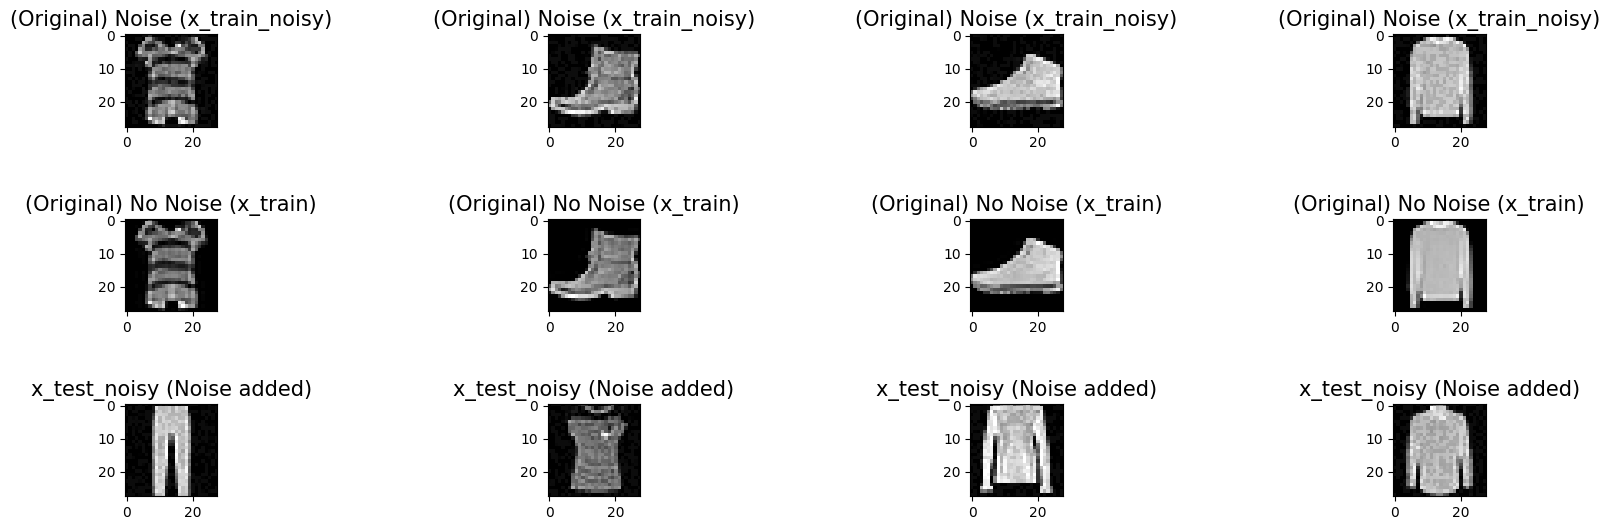

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(66)  # Set random seed for reproducibility
rng = np.random.default_rng(seed=66) # rng = Random Number Generator

# Random noise factor added to images
noise_factor = 0.2

# Generate and clip noise before adding it to the images
train_noise = tf.random.normal(shape=x_train.shape, mean=0.0, stddev=noise_factor)
val_noise = tf.random.normal(shape=x_val.shape, mean=0.0, stddev=noise_factor)
test_noise = tf.random.normal(shape=x_test.shape, mean=0.0, stddev=noise_factor)

# Clip the noise to stay within a controlled range
train_noise = tf.clip_by_value(train_noise, clip_value_min=-0.05, clip_value_max=0.05)
val_noise = tf.clip_by_value(val_noise, clip_value_min=-0.05, clip_value_max=0.05)
test_noise = tf.clip_by_value(test_noise, clip_value_min=-0.05, clip_value_max=0.05)

# Add the clipped noise to the images
x_train_noisy = x_train + train_noise
x_val_noisy = x_val + val_noise
x_test_noisy = x_test + test_noise

# Clipping to ensure pixel values remain in [0, 1]
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_val_noisy = tf.clip_by_value(x_val_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

# Randomly select 4 images from the training and test sets
n=4
random_indices_train = rng.choice(x_train.shape[0], size=n, replace=False)
random_indices_test = rng.choice(x_test.shape[0], size=n, replace=False)

# Plotting noisy vs original images with added spacing
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy image from test set
    cx = plt.subplot(3, n, i + 2 * n + 1)
    plt.title("x_test_noisy (Noise added)", fontsize=15)
    plt.imshow(tf.squeeze(x_test_noisy[random_indices_test[i]]).numpy(), cmap='gray')

    # Noisy image from training set
    ax = plt.subplot(3, n, i + 1)
    plt.title("(Original) Noise (x_train_noisy)", fontsize=15)
    plt.imshow(tf.squeeze(x_train_noisy[random_indices_train[i]]).numpy(), cmap='gray')

    # Original image from training set
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("(Original) No Noise (x_train)", fontsize=15)
    plt.imshow(tf.squeeze(x_train[random_indices_train[i]]).numpy(), cmap='gray')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=1.0)

plt.show()


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(49000, 28, 28, 1) (49000,)
(13989, 28, 28, 1) (13989,)
(6996, 28, 28, 1) (6996,)


**3.11 Define the Denoise Autoencoder**

Denoise autoencoder is coded to denoise images by learning to map noisy inputs to cleaner outputs

In [ ]:
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Denoising Autoencoder Definition
class EnhancedDenoise(Model):
    def __init__(self):
        super(EnhancedDenoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])  # Output image of size (28, 28, 1)

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Compile Autoencoder
enhanced_autoencoder = EnhancedDenoise()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
enhanced_autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(49000, 28, 28, 1) (49000,)
(13989, 28, 28, 1) (13989,)
(6996, 28, 28, 1) (6996,)


In [ ]:
# Verify Data Preprocessing:
print(tf.reduce_min(x_train), tf.reduce_max(x_train))
print(tf.reduce_min(x_train_noisy), tf.reduce_max(x_train_noisy))

tf.Tensor(0.0, shape=(), dtype=float64) tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


**3.12 Train the Autoencoder**

Model here is trained to reconstruct clean images from noisy images all while ensuring we minimize the validation loss.

In [ ]:
# !pip install tensorflow --upgrade --force-reinstall
# !pip install tensorflow-probability --upgrade --force-reinstall

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = enhanced_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=30,
    shuffle=True,
    validation_data=(x_val_noisy, x_val),
    callbacks=[early_stopping]
)

Epoch 1/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0333 - val_loss: 0.0061
Epoch 2/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 3/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 4/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 5/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 8/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 11/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 12/30
1532/1532 ━━━━━━

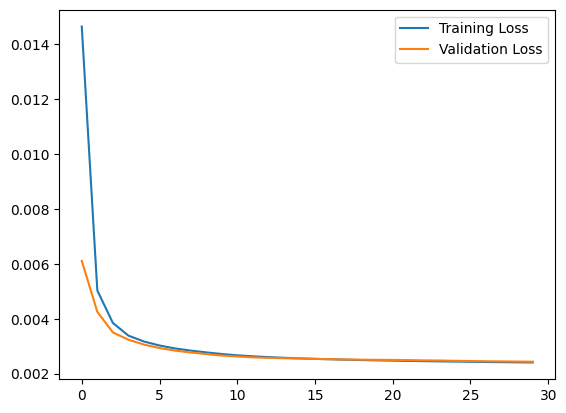

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

From the graph, I am able to understand that there is no overfitting, as the validation curve does not diverge from the validation loss.
Additionally, both training and validation loss decrease which indicated that the model and learning from the training data and improving it ablility to predict correct outputs

In [ ]:
enhanced_autoencoder.summary()
enhanced_autoencoder.encoder.summary()
enhanced_autoencoder.decoder.summary()


Model: "enhanced_denoise"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 7, 7, 8)             │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28, 1)           │           1,897 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,653 (37.71 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,436 (25.14 KB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

**3.13 Visualize Results**

tf.Tensor(3.6909859e-10, shape=(), dtype=float32) tf.Tensor(0.9916054, shape=(), dtype=float32)


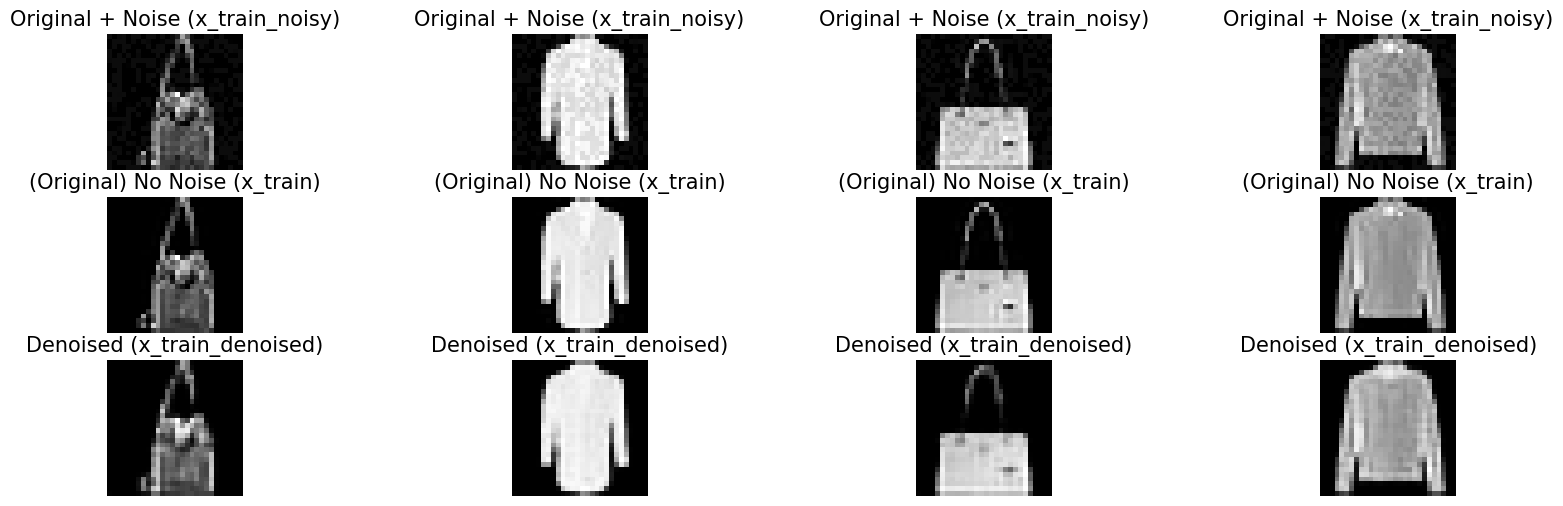

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Randomly select n indices from the training set
n = 4
random_indices_train = rng.choice(x_train.shape[0], size=n, replace=False)

# Use the trained autoencoder to denoise x_train_noisy
latent_representation = enhanced_autoencoder.encoder(x_train).numpy()
x_train_denoised = enhanced_autoencoder.decoder(latent_representation).numpy()

# Print min and max of denoised images for validation
print(tf.reduce_min(x_train_denoised), tf.reduce_max(x_train_denoised))

# Plotting selected examples: noisy vs denoised
plt.figure(figsize=(20, 6))
for i, idx in enumerate(random_indices_train):
    # Noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.title("Original + Noise (x_train_noisy)", fontsize=15)
    plt.imshow(tf.squeeze(x_train_noisy[idx]).numpy(), cmap='gray')  # Convert tensor to numpy
    ax.axis('off')

    # Original clean image
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("(Original) No Noise (x_train)", fontsize=15)
    plt.imshow(tf.squeeze(x_train[idx]).numpy(), cmap='gray')
    bx.axis('off')

    # Denoised image
    cx = plt.subplot(3, n, i + 2 * n + 1)
    plt.title("Denoised (x_train_denoised)", fontsize=15)
    plt.imshow(tf.squeeze(x_train_denoised[idx]).numpy(), cmap='gray')
    cx.axis('off')

plt.show()

In [ ]:
# Update all the datasplits
# Update x_train with denoised images
x_train = x_train_denoised

# Update x_test with original images -> Prevent Data Leakage
x_test = x_test_original

# Update x_val with original images -> Prevent Data Leakage
x_val = x_val_original

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(49000, 28, 28, 1) (49000,)
(13989, 28, 28, 1) (13989,)
(6996, 28, 28, 1) (6996,)


In [ ]:
print(x_train.shape)
print(x_train)

print(x_test.shape)
print(x_test)

(49000, 28, 28, 1)
[[[[1.69603081e-04]
   [4.38684901e-06]
   [1.18328999e-05]
   ...
   [3.75235941e-05]
   [2.72673224e-05]
   [1.26357202e-03]]

  [[3.34175013e-04]
   [1.48384806e-05]
   [2.73141245e-06]
   ...
   [5.40014553e-05]
   [9.43485156e-06]
   [7.46593287e-04]]

  [[2.91093928e-03]
   [1.98410533e-04]
   [3.19353312e-05]
   ...
   [1.92912732e-04]
   [6.07141919e-05]
   [3.25042027e-04]]

  ...

  [[4.91581486e-05]
   [3.15298639e-05]
   [4.62047501e-06]
   ...
   [5.40021283e-05]
   [1.49193329e-05]
   [2.46122072e-04]]

  [[7.09291780e-04]
   [2.08855403e-04]
   [1.95184948e-05]
   ...
   [1.36831339e-04]
   [2.89289492e-05]
   [1.64805955e-04]]

  [[8.67164321e-03]
   [2.88435514e-03]
   [9.13934491e-05]
   ...
   [7.75385182e-04]
   [9.41178005e-05]
   [1.40419230e-03]]]


 [[[1.69596446e-04]
   [4.39004225e-06]
   [1.18359458e-05]
   ...
   [3.39615071e-05]
   [2.55248069e-05]
   [1.24044681e-03]]

  [[3.34103010e-04]
   [1.48442559e-05]
   [2.73342675e-06]
   ...
  

**3.14 Summary of the Denoising Encoder Model**

In [ ]:
print("Encoder Summary:")
enhanced_autoencoder.encoder.summary()

print("\nDecoder Summary:")
enhanced_autoencoder.decoder.summary()


Encoder Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)


Decoder Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

**3.15 One Hot Encoding**

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(49000, 28, 28, 1) (49000, 10)
(13989, 28, 28, 1) (13989, 10)
(6996, 28, 28, 1) (6996, 10)


In [ ]:
print(y_train.shape)
print(y_val.shape)

(49000, 10)
(6996, 10)




---



In [ ]:
!pip install keras



---



In [ ]:
print(features)
print(label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
9


In [ ]:
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,2,...,0,0,0,6,217,220,141,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,75,74,109,55,0,3,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.label.describe()

,label
count,69947.000000
mean,4.500622
std,2.872581
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,9.000000


In [ ]:
dataset.label.value_counts()

,count
label,
8,7000
5,7000
9,6998
0,6997
7,6996
4,6994
1,6994
3,6993
6,6988




---



**3.16 Verify Data Splits**

This code allows you to see how the classes are balanced OR imbalanced across different sets at once.

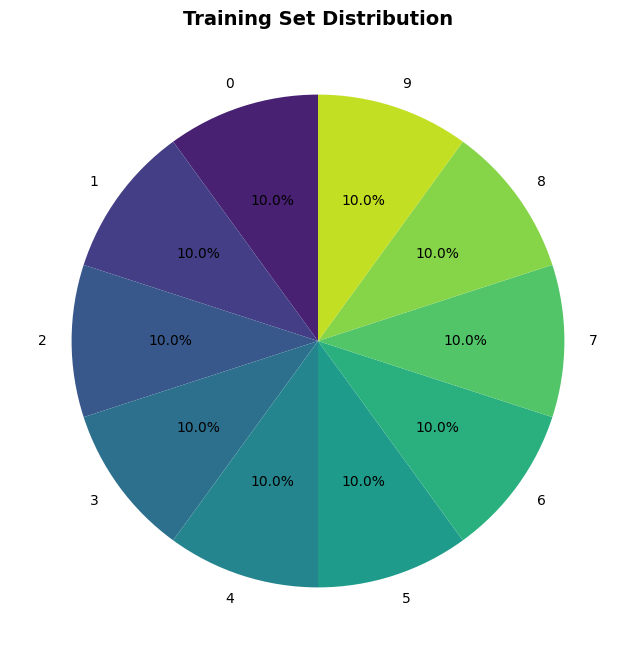

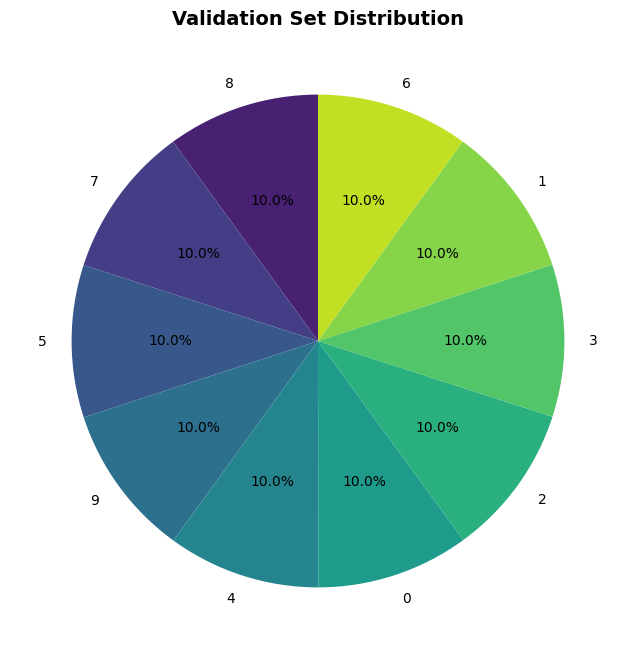

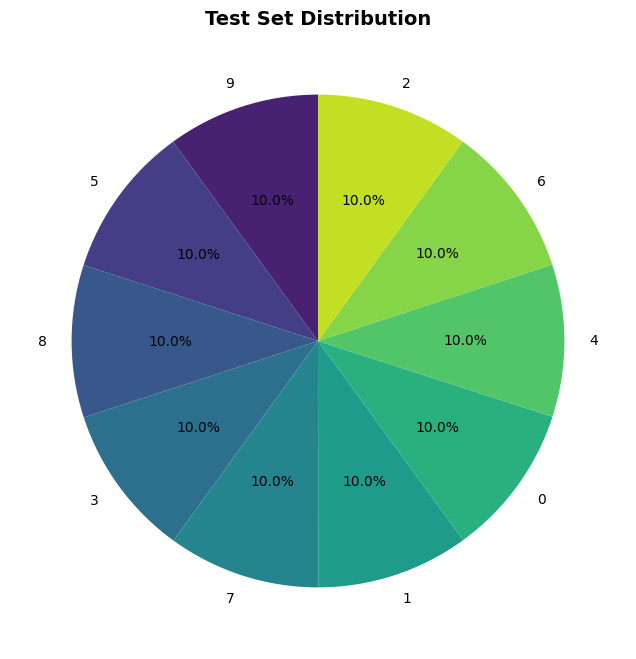

In [ ]:
# Verify Data Splits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_pie_chart(labels, title, figsize=(8, 8), cmap="viridis"):
    plt.figure(figsize=figsize)

    # If labels is 2D (one-hot encoded), convert to 1D class labels
    if labels.ndim == 2:  # Check if labels are one-hot encoded
        labels = np.argmax(labels, axis=1)  # Get class labels using argmax

    # Convert NumPy array to pandas Series for value_counts
    labels_series = pd.Series(labels)
    value_counts = labels_series.value_counts(normalize=True) * 100  # Get percentages
    plt.pie(
        value_counts.values,
        labels=value_counts.index,
        autopct="%.1f%%",  # Format to show percentage with one decimal place
        startangle=90,
        colors=sns.color_palette(cmap, len(value_counts))  # Use seaborn color palette
    )
    plt.title(title, fontsize=14, weight="bold")
    plt.show()

# Plot distributions
plot_pie_chart(y_train, "Training Set Distribution")
plot_pie_chart(y_val, "Validation Set Distribution")
plot_pie_chart(y_test, "Test Set Distribution")

In [ ]:
!pip install tensorflow

In [ ]:
print(x_train)

[[[[1.69603081e-04]
   [4.38684901e-06]
   [1.18328999e-05]
   ...
   [3.75235941e-05]
   [2.72673224e-05]
   [1.26357202e-03]]

  [[3.34175013e-04]
   [1.48384806e-05]
   [2.73141245e-06]
   ...
   [5.40014553e-05]
   [9.43485156e-06]
   [7.46593287e-04]]

  [[2.91093928e-03]
   [1.98410533e-04]
   [3.19353312e-05]
   ...
   [1.92912732e-04]
   [6.07141919e-05]
   [3.25042027e-04]]

  ...

  [[4.91581486e-05]
   [3.15298639e-05]
   [4.62047501e-06]
   ...
   [5.40021283e-05]
   [1.49193329e-05]
   [2.46122072e-04]]

  [[7.09291780e-04]
   [2.08855403e-04]
   [1.95184948e-05]
   ...
   [1.36831339e-04]
   [2.89289492e-05]
   [1.64805955e-04]]

  [[8.67164321e-03]
   [2.88435514e-03]
   [9.13934491e-05]
   ...
   [7.75385182e-04]
   [9.41178005e-05]
   [1.40419230e-03]]]


 [[[1.69596446e-04]
   [4.39004225e-06]
   [1.18359458e-05]
   ...
   [3.39615071e-05]
   [2.55248069e-05]
   [1.24044681e-03]]

  [[3.34103010e-04]
   [1.48442559e-05]
   [2.73342675e-06]
   ...
   [4.88456717e-05]
 

**3.17 Checking dataset with UMAP and 3D Plotting**

This code helps me visualise the relationships between data points in a lower-dimensional space, potentially revealing hidden patterns and class structures within my training set

In [ ]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
import umap.umap_ as umap
import numpy as np

# Make a copy of x_train and y_train -> preserve the original data
x_train_copy = x_train.copy()
y_train_copy = y_train.copy()

# Flatten the copied x_train data
x_train_flat = x_train_copy.reshape(x_train_copy.shape[0], -1)

# If labels are one-hot encoded, convert them back to class labels
if len(y_train_copy.shape) > 1 and y_train_copy.shape[1] == 10:
    y_train_class = np.argmax(y_train_copy, axis=1)  # Used y_train_copy
    new_df = pd.DataFrame({'class': y_train_class})  # This creates a dataframe for y_train_class
else:
    new_df = pd.DataFrame({'class': y_train_copy})  # This creates a dataframe ONLY IF y_train is already class labels

# Sample the dataset
subset_size = 10000  # manageable subset
x_train_flat_subset = x_train_flat[:subset_size]
y_train_subset = y_train_class[:subset_size] if len(y_train_copy.shape) > 1 else y_train_copy[:subset_size]

# UMAP with tuned parameters
umap_3d = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, metric='cosine')
x_umap = umap_3d.fit_transform(x_train_flat_subset)

# Create DataFrame and plot
umap_df = pd.DataFrame(x_umap, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['class'] = y_train_subset

fig = px.scatter_3d(
    umap_df, x='UMAP1', y='UMAP2', z='UMAP3',
    color='class', labels={'color': 'class'}
)
fig.update_traces(marker_size=2)
fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


From this visualisation the 3D plotting I notice that the data points are not uniformly distributed which suggests that the dataset has some struture.

I am able to identify a few outliers in the 3D model

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (49000, 28, 28, 1)
y_train shape: (49000, 10)


In [ ]:
print(x_train.dtype)
print(y_train.dtype)

float32
float64


# 4. Part 1 Model Training

**4.1 Baseline Model**

**4.2 LeNet-5 Model**

**4.3 Evaluate Models on Test Data**

Baseline Model

LeNet-5 Model

**Choose model here** --> LeNet-5 Model

**Reason**: In machine learning, the goal is often based on high accuracy and low loss of training models.
LeNet-5 model outperforms the baseline model on both these metrics



---



# Part 2 Model Training & Hypeparameter Tuning

In [ ]:
!pip install tensorflow keras-tuner scikit-learn matplotlib seaborn numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


4.1 Custom CNN Model



---



4.2 EfficientnetB0 Model (Transfer Model)

4.3 ResNet50 (Transfer Learning Model)

4.4 MobileNetV2 (Transfer Learning Model, Mobile-Friendly)

4.5 Support Vector Machine (SVM)

Loading Fashion-MNIST dataset...

Starting hyperparameter tuning with 10-Fold Cross-Validation...
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Training Time: 1523.66 seconds

===== Best Hyperparameters =====
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

Best Cross-Validation Score: 0.8742999999999999

===== Classification Report on Test Set =====
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.79      0.78      1000
           3       0.86      0.87      0.87      1000
           4       0.77      0.78      0.78      1000
           5       0.97      0.93      0.95      1000
           6       0.67      0.64      0.65      1000
           7       0.92      0.96      0.94      1000
           8       0.94      0.97      0.95      1000
           9       0.96      0.95      0.95      1000

    accuracy           

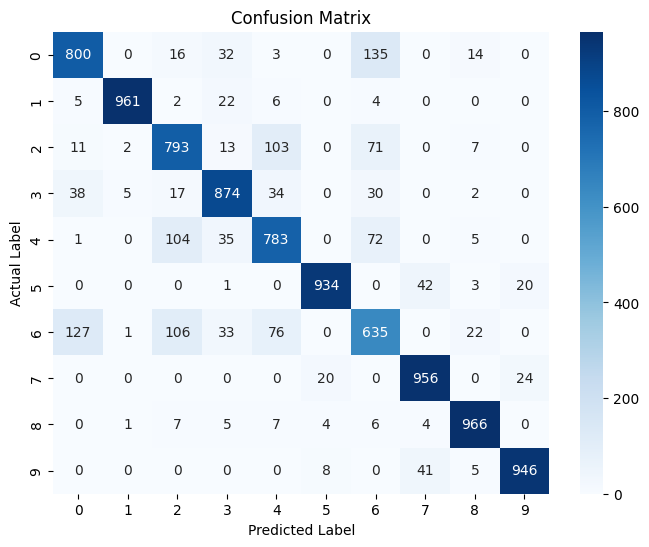

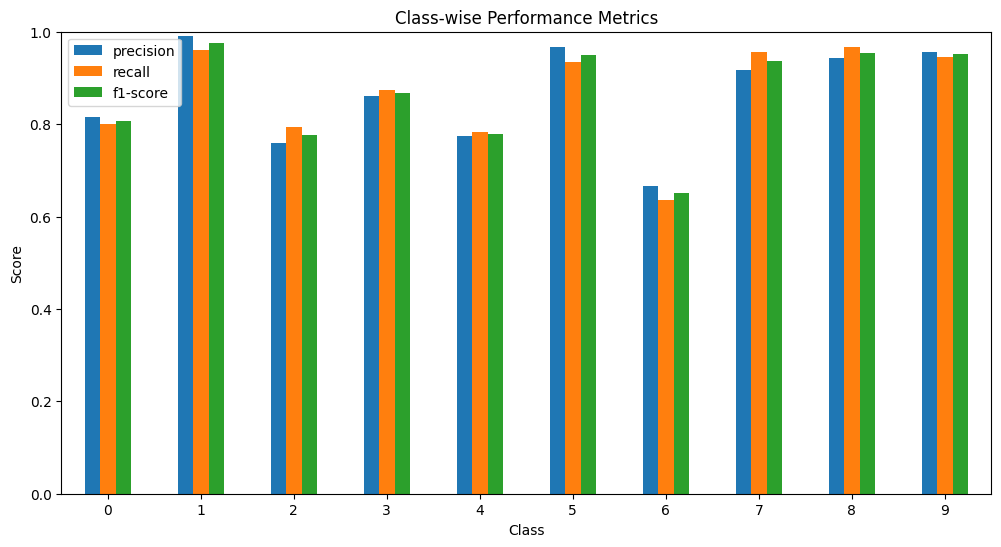


ROC-AUC Score (One-vs-Rest): 0.9879


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

# =============================
# 1. Data Loading and Preprocessing
# =============================

# Load Fashion-MNIST dataset
print("Loading Fashion-MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test  = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Use a subset of the training data for faster training
subset_size = 10000
x_train_subset = x_train[:subset_size]
y_train_subset = y_train[:subset_size]

# =============================
# 2. Pipeline and Hyperparameter Grid Setup
# =============================

# Apply PCA for dimensionality reduction (keeps 95% variance)
pca = PCA(n_components=0.95)

# Create an SVM pipeline with StandardScaler, PCA, and SVM
pipeline = make_pipeline(StandardScaler(), pca, SVC(probability=True))

# Define the hyperparameter grid (reduced C values)
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10],  # Reduced values to prevent overfitting
    'svc__gamma': ['scale'],       # 'scale' adapts gamma based on input
    'svc__kernel': ['rbf']         # Using RBF kernel
}

# Set up GridSearchCV with 10-fold cross-validation (more robust)
grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, verbose=2)

# =============================
# 3. Hyperparameter Tuning (Training)
# =============================

print("\nStarting hyperparameter tuning with 10-Fold Cross-Validation...")
start_time = time.perf_counter()

# Fit the grid search on the subset of training data
grid_search.fit(x_train_subset, y_train_subset)

# End timing
training_time = time.perf_counter() - start_time
print(f"\nTraining Time: {training_time:.2f} seconds")

# Display the best hyperparameters and cross-validation score
print("\n===== Best Hyperparameters =====")
print(grid_search.best_params_)
print("\nBest Cross-Validation Score:", grid_search.best_score_)

# =============================
# 4. Evaluation on the Test Set
# =============================

# Retrieve the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)

print("\n===== Classification Report on Test Set =====")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Extract key metrics
svm_accuracy  = report['accuracy']
svm_precision = report['weighted avg']['precision']
svm_recall    = report['weighted avg']['recall']
svm_f1        = report['weighted avg']['f1-score']

# =============================
# 5. Plotting Evaluation Metrics
# =============================

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Plot class-wise Precision, Recall, and F1-Score as a bar chart
df_report = pd.DataFrame(report).transpose()
df_metrics = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_metrics = df_metrics[['precision', 'recall', 'f1-score']]
df_metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Class-wise Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

# =============================
# 6. ROC-AUC Score Calculation
# =============================

# Obtain predicted probabilities for the test set
y_pred_proba = best_model.predict_proba(x_test)

try:
    # Convert true labels to one-hot encoding for multiclass ROC-AUC calculation
    y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)
    roc_auc = roc_auc_score(y_test_onehot, y_pred_proba, multi_class='ovr')
    print(f"\nROC-AUC Score (One-vs-Rest): {roc_auc:.4f}")
except Exception as e:
    print("\nError computing ROC-AUC Score:", e)

# =============================
# 7. Learning Curve (Fix Overfitting)
# =============================

train_sizes, train_scores, valid_scores = learning_curve(
    best_model, x_train_subset, y_train_subset, cv=10, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, valid_scores_mean, 'o-', label="Cross-Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Adjusted Model)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [ ]:
svm_model = final_model

NameError: name 'final_model' is not defined

LSTMs (Long Short-Term Memory) Training Model

Why am I using LSTMs?

While CNNs are often the go-to for image classification tasks, LSTMs are useful to test and evaluate how well sequential patterns recognition could possibly improve performance.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import keras_tuner as kt

# ========================================
# 1. Data Loading and Preprocessing
# ========================================
print("Loading Fashion-MNIST dataset...")
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print class distribution
print("\n--- Class Distribution ---")
unique, counts = np.unique(y_train, return_counts=True)
for cl, count in zip(unique, counts):
    print(f"  Class {cl}: {count} samples")

# Normalize images to [0, 1]
x_train = x_train / 255.0
x_test  = x_test / 255.0

# For LSTM, treat each image as a sequence of 28 timesteps with 28 features.
x_train_seq = x_train.reshape(x_train.shape[0], 28, 28)
x_test_seq  = x_test.reshape(x_test.shape[0], 28, 28)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# Instead of a single validation split, we'll later use K-Fold Cross-Validation.
# But for tuning purposes, we temporarily split a small validation set.
x_train_seq, x_val_seq, y_train_cat_temp, y_val_cat_temp = train_test_split(
    x_train_seq, y_train_cat, test_size=0.1, random_state=42
)

# ========================================
# 2. Data Augmentation
# ========================================
# Although augmentation is more common for CNNs, we include it here.
# ImageDataGenerator expects 4D inputs so we temporarily add a channel dimension.
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train_seq.reshape(-1, 28, 28, 1))

# ========================================
# 3. Hypermodel Definition for LSTM
# ========================================
def build_lstm_model(hp):
    model = models.Sequential()
    # Our generator provides inputs of shape (28, 28, 1); reshape to (28, 28)
    model.add(layers.Reshape((28, 28), input_shape=(28, 28, 1)))

    # First LSTM layer with tunable number of units
    lstm_units1 = hp.Int('lstm_units1', min_value=64, max_value=256, step=64, default=128)
    model.add(layers.LSTM(lstm_units1, activation='relu', return_sequences=True))

    # Second LSTM layer with tunable number of units
    lstm_units2 = hp.Int('lstm_units2', min_value=32, max_value=128, step=32, default=64)
    model.add(layers.LSTM(lstm_units2, activation='relu'))

    # Dense layer with tunable number of units
    dense_units = hp.Int('dense_units', min_value=32, max_value=128, step=32, default=64)
    model.add(layers.Dense(dense_units, activation='relu'))

    # Dropout layer with tunable dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.6, step=0.1, default=0.5)
    model.add(layers.Dropout(dropout_rate))

    # Output layer for 10 classes
    model.add(layers.Dense(10, activation='softmax'))

    # Tunable learning rate for the Adam optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-3, 3e-4, 1e-4], default=1e-3)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ========================================
# 4. Set Up KerasTuner for Hyperparameter Search
# ========================================
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=2,            # Try 10 different hyperparameter combinations
    executions_per_trial=1,   # Each configuration is trained once (increase for averaging)
    directory='lstm_tuning_dir',
    project_name='fashion_mnist_lstm'
)

# Early stopping callback during tuning
tuner_early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nStarting hyperparameter search...")
start_tuner = time.perf_counter()
tuner.search(
    datagen.flow(x_train_seq.reshape(-1, 28, 28, 1), y_train_cat_temp, batch_size=64),
    epochs=10,
    validation_data=(x_val_seq.reshape(-1, 28, 28, 1), y_val_cat_temp),
    callbacks=[tuner_early_stop],
    verbose=1
)
tuner_time = time.perf_counter() - start_tuner
print(f"Hyperparameter tuning took: {tuner_time:.2f} seconds")

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
for key, value in best_hp.values.items():
    print(f"  {key}: {value}")

# ========================================
# 4.5. 5-Fold Cross-Validation with Best Hyperparameters
# ========================================
print("\nStarting 5-Fold Cross-Validation with best hyperparameters:")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold = 1

# Use the entire training data (x_train_seq, y_train_cat) for cross-validation
for train_index, val_index in kf.split(x_train_seq):
    print(f"\n--- Fold {fold} ---")
    X_train_fold, X_val_fold = x_train_seq[train_index], x_train_seq[val_index]
    y_train_fold, y_val_fold = y_train_cat[train_index], y_train_cat[val_index]

    # Create generator flows for this fold
    train_gen_fold = datagen.flow(X_train_fold.reshape(-1, 28, 28, 1), y_train_fold, batch_size=64)
    val_gen_fold = (X_val_fold.reshape(-1, 28, 28, 1), y_val_fold)

    # Build a new model for the fold using the best hyperparameters
    model_fold = tuner.hypermodel.build(best_hp)

    fold_early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model_fold.fit(train_gen_fold,
                   epochs=10,
                   validation_data=val_gen_fold,
                   callbacks=[fold_early_stop],
                   verbose=0)

    loss, acc = model_fold.evaluate(X_val_fold.reshape(-1, 28, 28, 1), y_val_fold, verbose=0)
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    fold_accuracies.append(acc)
    fold += 1

avg_cv_acc = np.mean(fold_accuracies)
print(f"\nAverage Cross-Validation Accuracy: {avg_cv_acc:.4f}")

# ========================================
# 5. Retrain the Best Model on Full Training Data
# ========================================
# Now retrain on the entire training data (x_train_seq, y_train_cat)
print("\nRetraining the best model on full training data...")
best_model = tuner.hypermodel.build(best_hp)

final_early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

start_final = time.perf_counter()
history = best_model.fit(
    datagen.flow(x_train_seq.reshape(-1, 28, 28, 1), y_train_cat, batch_size=64),
    epochs=15,
    validation_data=(x_val_seq.reshape(-1, 28, 28, 1), y_val_cat_temp),
    callbacks=[final_early_stop, lr_scheduler],
    verbose=1
)
final_training_time = time.perf_counter() - start_final
print(f"Final training time: {final_training_time:.2f} seconds")

# ========================================
# 6. Evaluate the Final Model on the Test Set
# ========================================
test_loss, test_acc = best_model.evaluate(x_test_seq.reshape(-1, 28, 28, 1), y_test_cat, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Generate predictions on the test set
y_pred_prob = best_model.predict(x_test_seq.reshape(-1, 28, 28, 1))
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# ========================================
# 7. Visualization and Reporting
# ========================================

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Classification Report:")
report = classification_report(y_true, y_pred_classes, output_dict=True)
print(classification_report(y_true, y_pred_classes))

# Plot class-wise performance metrics (Precision, Recall, F1-Score)
report_df = pd.DataFrame(report).transpose()
# Remove summary rows for per-class analysis
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title("Class-wise Performance Metrics")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate ROC-AUC Score (One-vs-Rest)
try:
    roc_auc = roc_auc_score(y_test_cat, y_pred_prob, multi_class='ovr')
    print(f"ROC-AUC Score (One-vs-Rest): {roc_auc:.4f}")
except Exception as e:
    print("Error calculating ROC-AUC:", e)

# ========================================
# 8. Final Metrics Summary
# ========================================
# Extract key metrics from the classification report
lstm_precision = report['weighted avg']['precision']
lstm_recall = report['weighted avg']['recall']
lstm_f1 = report['weighted avg']['f1-score']
lstm_time = final_training_time

print("\nOptimal hyperparameter tuning and training completed.")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-Score: {lstm_f1:.4f}")
print(f"Final Training Time: {lstm_time:.2f} seconds")


In [ ]:
lstm_model = final_model

Performance Summary Table

In [ ]:

results = {
    'Model': ['Custom CNN', 'EfficientNetB0', 'MobileNetV2', 'ResNet50', 'SVM', 'LSTM'],
    'Accuracy': [cnn_accuracy, effnet_accuracy, mobilenet_accuracy, resnet_accuracy, svm_accuracy, lstm_accuracy],
    'Precision': [cnn_precision, effnet_precision, mobilenet_precision, resnet_precision, svm_precision, lstm_precision],
    'Recall': [cnn_recall, effnet_recall, mobilenet_recall, resnet_recall, svm_recall, lstm_recall],
    'F1-Score': [cnn_f1, effnet_f1, mobilenet_f1, resnet_f1, svm_f1, lstm_f1],
    'Training Time (s)': [cnn_time, effnet_time, mobilenet_time, resnet_time, svm_time, lstm_time]
}

# Create DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame
print(df_results)

# 5. Analyse & Evaluate

**5.1 Model Predictions**

In [ ]:
# Get predictions for the test set
y_pred = lenet_model.predict(x_test)

# Convert the predictions from one-hot encoded to labels (for evaluation)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Display the first 5 predictions vs true labels
print("First 5 Predictions vs True Labels:")
for i in range(5):
    print(f"Predicted: {y_pred_labels[i]}, True: {y_true_labels[i]}")


**5.2 Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**5.3 Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=[str(i) for i in range(10)]))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=[str(i) for i in range(10)], output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[c]['precision'] for c in classes]
recall = [report[c]['recall'] for c in classes]
f1_score = [report[c]['f1-score'] for c in classes]

# Create line plots
plt.figure(figsize=(12, 6))
plt.plot(classes, precision, label='Precision', marker='o', color='blue', linestyle='-')
plt.plot(classes, recall, label='Recall', marker='o', color='orange', linestyle='--')
plt.plot(classes, f1_score, label='F1-Score', marker='o', color='green', linestyle='-.')

# Add labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Metrics by Class')
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


**5.4 Learning Curves (Accuracy and Loss)**

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**5.5 ROC-Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Print Macro-average AUC
print(f"Macro-average ROC AUC: {np.mean(list(roc_auc.values())):.4f}")


**5.6 Model Summary and Parameters**

In [ ]:
# Print model summary
lenet_model.summary()


In [ ]:
from sklearn.metrics import precision_score
import numpy as np

# Predict class labels for the test set
y_pred = lenet_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Get the true class labels
y_true = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded, convert to class labels

# Calculate precision
precision = precision_score(y_true, y_pred_classes, average='macro')  # For multi-class, use 'macro'
print(f"Precision: {precision}")


In [ ]:
import tensorflow as tf
import datetime

# Create a TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit your model with the TensorBoard callback
history = lenet_model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_callback]
)

# Start TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/fit



---



# Plans for Improvement

In my opinion, the project displays a good understanding of deep learning of workflow. From loading a large dataset onto Google Colab to combining datasets, shuffling and partitioning were done to ensure unbiased training, and avoiding data leakage, which was maintained throughout the project. This goes to show a careful approach to data management.  

Data Exploration had a structured approach where steps were broken down into clear sections. While visualizing the dataset throughout the project, I was able to build an understanding of important characteristics of the dataset, such as the number of samples, features, duplicates, image type, number of dimensions, etc. The pathway of detailed data exploration was essential as it led me to identify significant steps in data pre-processing.

Within data pre-processing, I identified issues and solved them, such as class imbalance, ensuring ordinal relationship, usage of denoising encoder, one hot encoding, data augmentation, image reshaping & many more efforts in improving the dataset, focusing on data integrity & taking data preprocessing steps that would be appropriate for model training. Each data preprocessing step was well thought through as step links with the next going deeper into the pipeline.

Despite, effectively handling detailed data exploration and detailed preprocessing throughout the project, some improvements could be made. More advanced robust visualizations and explorations could have been made viz scatter plots, and heatmaps which in Part 2 will be addressed.

I believe data preprocessing could have been enhanced via techniques for detecting and emphasizing edges or patterns in images.
Additionally, techniques like Principal Component Analysis (PCA) could be used to reduce dimensionality further. Besides all these changes included so far will be used for Project Part 2, plans include hyperparameter tuning with K-Fold, model ensembling, transfer learning, & feature engineering. I will be looking into leveraging external benchmarks and experimenting with advanced augmentation techniques to ensure a comprehensive Project Part 2.

